**EDA**

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights
from data using statistical measures and visualizations. The objective of EDA is to develop and 
understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, 
visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand,
it requires asking interesting questions to guide the investigation and interpreting numbers & figures 
to generate useful insights

The following topics are covered in this Project:

Downloading a dataset from an online source
Data preparation and cleaning with Pandas
Open-ended exploratory analysis and visualization
Asking and answering interesting questions
Summarizing inferences and drawing conclusions





**INTRODUCTION**

New York, often called New York City or simply NYC, is the most populous city in the United States located at the southern tip of New York State, on one of the world's largest natural harbors. The city comprises five boroughs, each of which is coextensive with a respective county. It is a global city and a cultural, financial, high-tech, entertainment, and media center with a significant influence on commerce, health care, scientific output, life sciences, research, technology, education, politics, tourism, dining, art, fashion, and sports. Home to the headquarters of the United Nations, New York is an important center for international diplomacy, and it is sometimes described as the world's most important city and the capital of the world.


Airbnb, Inc is an American San Francisco-based company operating an online marketplace for short- and long-term homestays and experiences. The company acts as a broker and charges a commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com. Airbnb is the most well-known company for short-term housing rentals

we have downloaded the datasets from the Kaggle website./kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv




In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


Let's load the CSV files using the Pandas library. We'll use the name model for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [51]:
model=pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [52]:
pd.set_option('display.max_columns',None)

In [53]:
model.shape

(48895, 16)

This datasets consists of total of 48895 rows and 16 columns

In [54]:
model.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


above table shows the top 3 records of the datasets

In [55]:
len(model.columns)

16

In [56]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [57]:
model.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [58]:
model.price.info()


<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: price
Non-Null Count  Dtype
--------------  -----
48895 non-null  int64
dtypes: int64(1)
memory usage: 382.1 KB


In [59]:
model.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [60]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [61]:
model.availability_365.nunique()

366

In [62]:
model.calculated_host_listings_count.nunique()

47

In [63]:
model.reviews_per_month.nunique()

937

In [64]:
model.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**DATA CLEANING**

data cleaning referes to the cleaning of duplicate ,irrevelat datas within the datasets

Now let us take a look at the  total number of Null values within the datasets

In [65]:
model.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In the following code ,dropping of few columns has been done 

In [66]:
model = model.drop(["id","last_review","name","host_name"],axis=1)
model.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


The rows which has been availabilty 0 has been removed from the data

In [67]:
model = model.drop(model[model['availability_365']==0].index,axis=0)
model = model.reset_index()
model

,index,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31357,48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
31358,48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
31359,48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
31360,48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


The missing values in the column has been filled with 0

In [68]:
model["reviews_per_month"] = model['reviews_per_month'].fillna(0)
model.head()

,index,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


When we again take a look at total number of null values it can be seen that there are no null values after data cleaning process has been done

In [69]:
model.isnull().sum()

index                             0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [70]:
model.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'Murray Hill',
       "Hell's Kitchen", 'Chinatown', 'Upper West Side', 'South Slope',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'East Harlem', 'Park Slope', 'Bedford-Stuyvesant',
       'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint',
       'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'West Village', 'Gowanus', 'Flatlands',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Ridgewood', 'Morningside Heights', 'Jamaica',
       'Middle Village', 'NoHo', 'Ditmars Steinway', 'Cobble Hill',
       'Flatiron District', 'Roosevelt Island', 'Greenwich Village',
       'East Flatbush', 'Tompkinsville', 'Astoria', 'Clason Point',
       'Eastchester', '

**EDA**

In [90]:
model.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

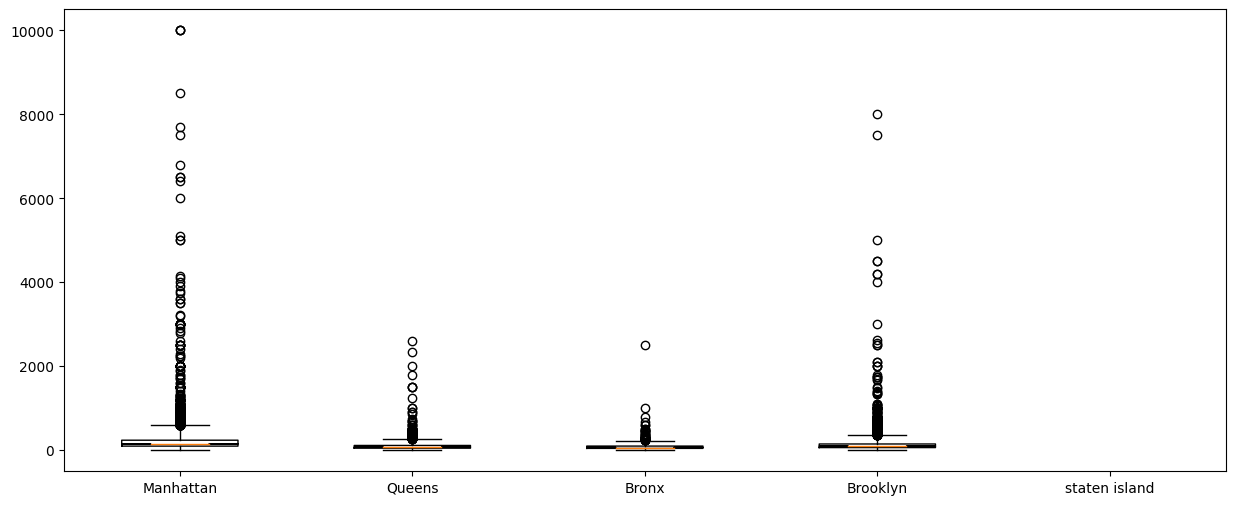

In [85]:
bnb_neighbour=['Manhattan','Queens','Bronx','Brooklyn','staten island']
x = bnb_neighbour
y = []
for i in x:
    y.append(model[model['neighbourhood_group']==i]['price'].values.tolist())
plt.figure(figsize=(15,6))
plt.boxplot(y,notch=True, whis=2.5)
plt.xticks([1, 2, 3,4,5], x);

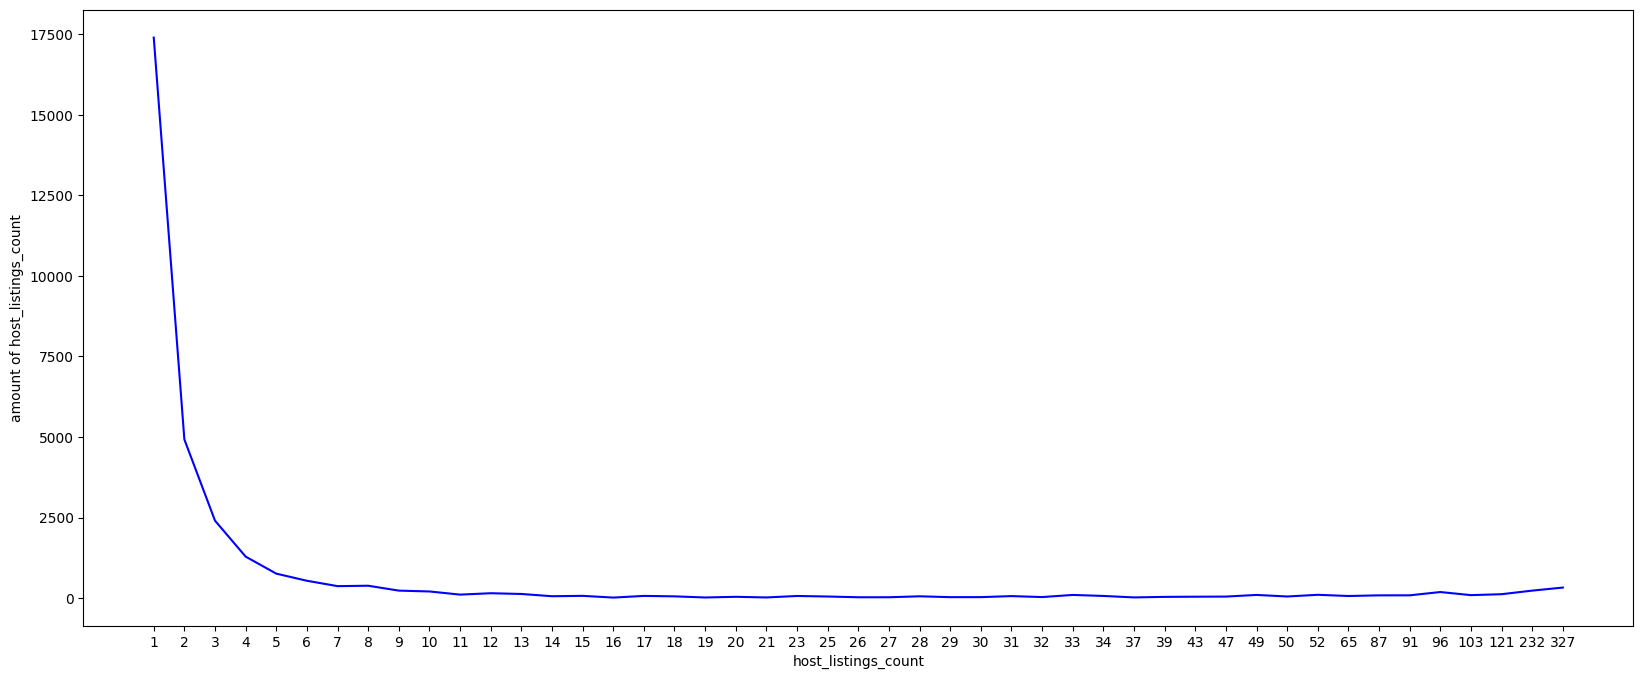

In [86]:
x = model['calculated_host_listings_count'].value_counts().sort_index().index.astype(str)
y = model['calculated_host_listings_count'].value_counts().sort_index().values
plt.figure(figsize=(20,8))
plt.xlabel("host_listings_count")
plt.ylabel("amount of host_listings_count")
plt.plot(x,y,color = "blue")

**ASKING AND ANSWERING QUESTIONS**

**Q1.which neighbourhood group have highest share?**

Text(0, 0.5, 'count')

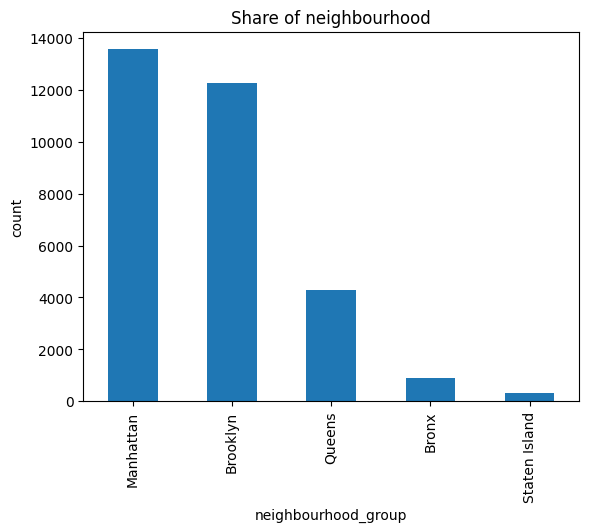

In [87]:
model.neighbourhood_group.value_counts().plot(kind="bar")
plt.title("Share of neighbourhood")
plt.xlabel("neighbourhood_group")
plt.ylabel("count")

<Axes: ylabel='count'>

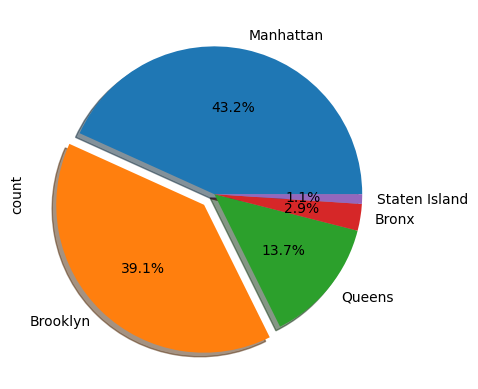

In [88]:
model['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.1,0,0,0],autopct='%1.1f%%',shadow=True)

**Q2.which neighbourhood has highest number of different room ?** 

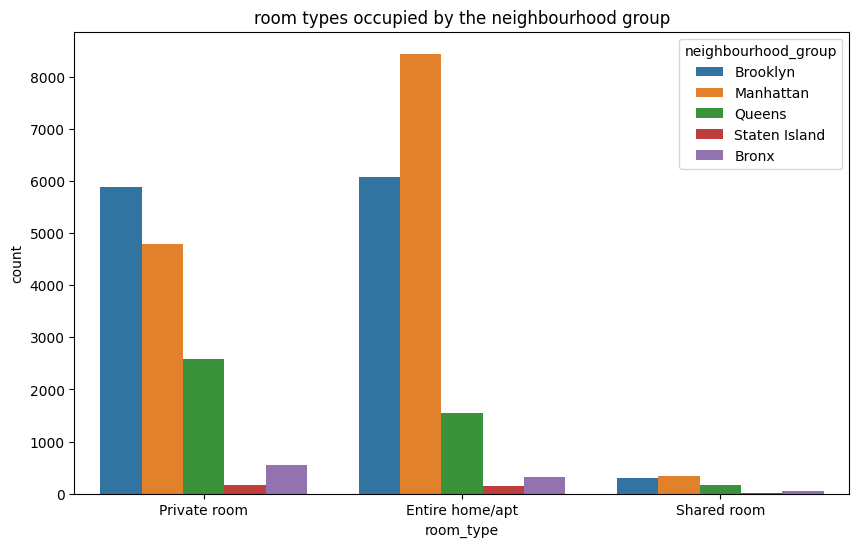

In [101]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = model)
plt.title("room types occupied by the neighbourhood group")
plt.show()

**Q3.in which neighbour prices are high?**

<Axes: xlabel='neighbourhood_group', ylabel='price'>

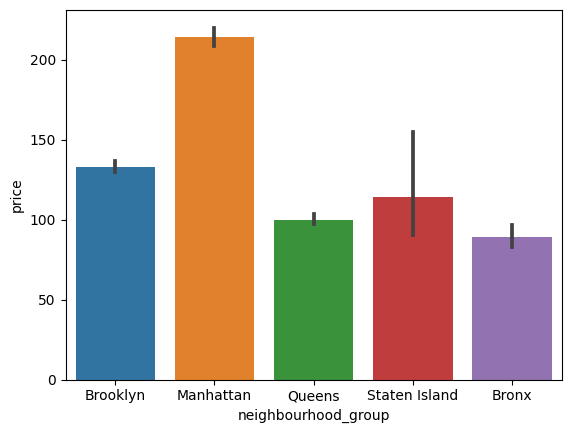

In [91]:
sns.barplot(data=model,x="neighbourhood_group",y="price")

In [94]:
model['price'].describe()

count    31362.000000
mean       162.050475
std        254.425463
min          0.000000
25%         70.000000
50%        111.500000
75%        189.000000
max      10000.000000
Name: price, dtype: float64

In [96]:
#sns.heatmap(model.corr(),annot=True,cmap='Blues')

**Q4.price ranges of different room type?**

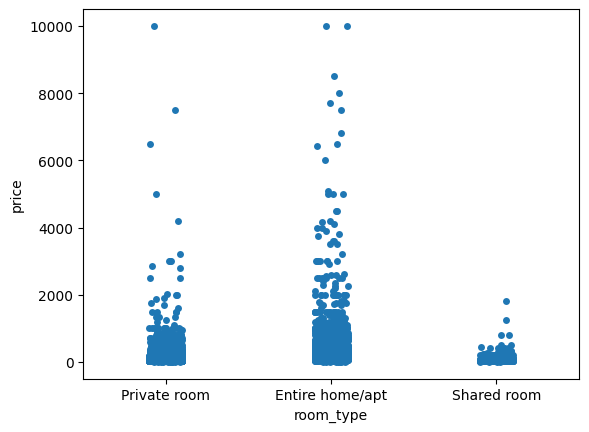

In [97]:
sns.stripplot(data=model,x='room_type',y='price',jitter=True)

plt.show()

**Q5.which rooms has more reviews(with respect to price)?**

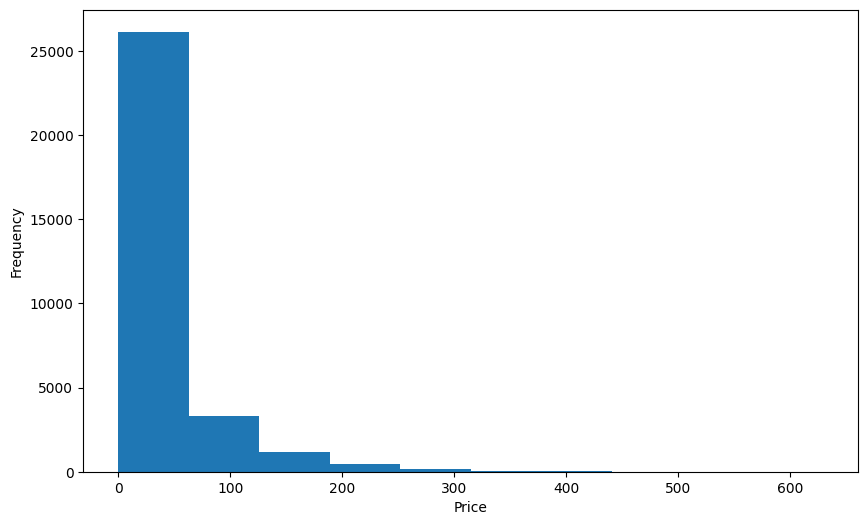

In [98]:
plt.figure(figsize=(10,6))
model['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")

plt.show()

**Q6.which rooms have minimum prices?**

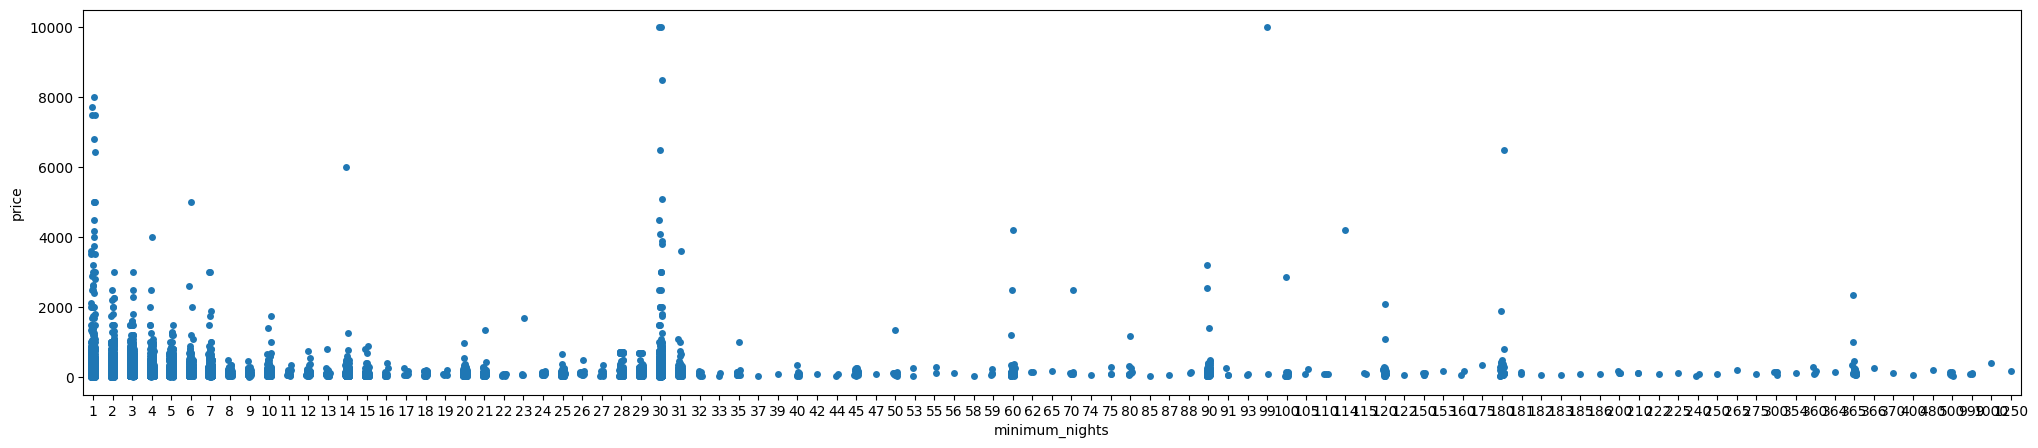

In [99]:
f,ax = plt.subplots(figsize=(25,5))
ax=sns.stripplot(data=model,x='minimum_nights',y='price',jitter=True)

plt.show()

In [102]:
px.histogram(model,x='price')

**Q7.what are the rooms with maximum reviews?**

In [103]:
model_review=model.sort_values(by=['number_of_reviews'],ascending=False).head(100)
model_review.head()

,index,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
6636,11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
1536,2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
1535,2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
1524,2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
7256,13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173


**Q8 wht are the rooms with minimum reviews?**

In [104]:
min_review=model.sort_values(by=['number_of_reviews'],ascending=True).head(100)
min_review.head()

,index,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
31361,48894,68119814,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,0.0,1,23
25512,42641,147827717,Manhattan,Upper East Side,40.76329,-73.96119,Private room,109,4,0,0.0,1,101
6962,12592,24199235,Manhattan,Midtown,40.75328,-73.97212,Private room,224,3,0,0.0,1,3
25515,42644,248161322,Brooklyn,Bushwick,40.70028,-73.93952,Shared room,35,30,0,0.0,14,333
25516,42645,39890192,Manhattan,Upper West Side,40.80319,-73.96676,Private room,70,15,0,0.0,12,153
